### MACHINE LEARNING

Algorítimos de Classificação -> Naive Bayes

Esse algorítimo utiliza o Teorema de Bayes em sua estrutura para considerar as categorias ou caracteristicas da relação independentes umas das outras.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix # -> cria a matriz de confusao de forma visal/grafica

C:\Users\94512868372\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [3]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [5]:
# Na relação (dataset credito), separamos os atributos previsores e a classe

previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

Transformação dos atributos categóricos em atributos numéricos.

O Naive Bayes não processa dados categóricos!

In [6]:
# Precisamos criar um objeto LabelEncoder() para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste

labelencoder1 = LabelEncoder()
previsores[:, 0] = labelencoder1.fit_transform(previsores[:, 0])

labelencoder2 = LabelEncoder()
previsores[:, 2] = labelencoder2.fit_transform(previsores[:, 2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

Dividindo os dados para Treino e Teste

In [7]:
# aproximadamente 70% para treino e 30% para teste

x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state=0)

x_test

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

A partir de agora, com os dados na forma numérica e com a base de treino e teste devidamente separadas, podemos criar e treinar o modelo!.
<br>
Utilizamos aqui a classe _GaussianNB()_ (gaussian naive bayes) de sklearn

In [8]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

#### Previsões

In [9]:
previsoes = model_nb.predict(x_test)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [10]:
# Matriz de confusão -> confronto entre o real (y_test) e o previsto (previsoes com x_test)

confusao = confusion_matrix(y_test, previsoes) # y_test -> representa a classe separada para teste (30%)
confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [11]:
#taxa de erros e acertos

tx_acertos = accuracy_score(y_test, previsoes)
tx_erros = 1 - tx_acertos

tx_acertos, tx_erros

(0.71, 0.29000000000000004)

C:\Users\94512868372\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


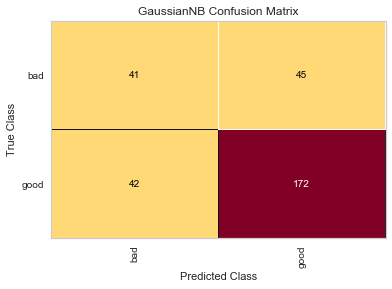

In [12]:
# Vizualização da Matriz de confusao de modo grafico com yellowbrick

v_confusao = ConfusionMatrix(GaussianNB())
v_confusao.fit(x_train, y_train)
v_confusao.score(x_test, y_test)
v_confusao.poof()

Colocando o modelo em produção para previsoes com novos/desconhecidos dados

In [13]:
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [14]:
# transformação em dados numericos
# Usamos o mesmo objeto que foi criado antes, assim mantemos o padrao dos dados

novo_credito = novo_credito.iloc[:, 0:20].values

novo_credito[:, 0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:,2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:,3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:,5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:,6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:,8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:,9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:,11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:,13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:,14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:,16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:,18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:,19])

In [15]:
# predição

model_nb.predict(novo_credito)

array(['good'], dtype='<U4')